## Importing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from joblib import dump

## Data preprocessing

In [2]:
water=pd.read_csv("waterQuality.csv")

In [3]:
water.head()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1


In [4]:
water.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7996 entries, 0 to 7995
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7996 non-null   float64
 1   ammonia      7996 non-null   float64
 2   arsenic      7996 non-null   float64
 3   barium       7996 non-null   float64
 4   cadmium      7996 non-null   float64
 5   chloramine   7996 non-null   float64
 6   chromium     7996 non-null   float64
 7   copper       7996 non-null   float64
 8   flouride     7996 non-null   float64
 9   bacteria     7996 non-null   float64
 10  viruses      7996 non-null   float64
 11  lead         7996 non-null   float64
 12  nitrates     7996 non-null   float64
 13  nitrites     7996 non-null   float64
 14  mercury      7996 non-null   float64
 15  perchlorate  7996 non-null   float64
 16  radium       7996 non-null   float64
 17  selenium     7996 non-null   float64
 18  silver       7996 non-null   float64
 19  uraniu

In [5]:
water.describe()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
count,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,...,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000
mean,0.666396,14.278212,0.161477,1.567928,0.042803,2.177589,0.247300,0.805940,0.771646,0.319714,...,0.099431,9.819250,1.329846,0.005193,16.465266,2.920106,0.049684,0.147811,0.044672,0.114057
std,1.265323,8.878930,0.252632,1.216227,0.036049,2.567210,0.270663,0.653595,0.435423,0.329497,...,0.058169,5.541977,0.573271,0.002967,17.688827,2.322805,0.028773,0.143569,0.026906,0.317900
min,0.000000,-0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.040000,6.577500,0.030000,0.560000,0.008000,0.100000,0.050000,0.090000,0.407500,0.000000,...,0.048000,5.000000,1.000000,0.003000,2.170000,0.820000,0.020000,0.040000,0.020000,0.000000
50%,0.070000,14.130000,0.050000,1.190000,0.040000,0.530000,0.090000,0.750000,0.770000,0.220000,...,0.102000,9.930000,1.420000,0.005000,7.745000,2.410000,0.050000,0.080000,0.050000,0.000000
75%,0.280000,22.132500,0.100000,2.482500,0.070000,4.240000,0.440000,1.390000,1.160000,0.610000,...,0.151000,14.610000,1.760000,0.008000,29.487500,4.670000,0.070000,0.240000,0.070000,0.000000
max,5.050000,29.840000,1.050000,4.940000,0.130000,8.680000,0.900000,2.000000,1.500000,1.000000,...,0.200000,19.830000,2.930000,0.010000,60.010000,7.990000,0.100000,0.500000,0.090000,1.000000


In [6]:
water.shape

(7996, 21)

array([[<AxesSubplot:title={'center':'aluminium'}>,
        <AxesSubplot:title={'center':'ammonia'}>,
        <AxesSubplot:title={'center':'arsenic'}>,
        <AxesSubplot:title={'center':'barium'}>,
        <AxesSubplot:title={'center':'cadmium'}>],
       [<AxesSubplot:title={'center':'chloramine'}>,
        <AxesSubplot:title={'center':'chromium'}>,
        <AxesSubplot:title={'center':'copper'}>,
        <AxesSubplot:title={'center':'flouride'}>,
        <AxesSubplot:title={'center':'bacteria'}>],
       [<AxesSubplot:title={'center':'viruses'}>,
        <AxesSubplot:title={'center':'lead'}>,
        <AxesSubplot:title={'center':'nitrates'}>,
        <AxesSubplot:title={'center':'nitrites'}>,
        <AxesSubplot:title={'center':'mercury'}>],
       [<AxesSubplot:title={'center':'perchlorate'}>,
        <AxesSubplot:title={'center':'radium'}>,
        <AxesSubplot:title={'center':'selenium'}>,
        <AxesSubplot:title={'center':'silver'}>,
        <AxesSubplot:title={'center':'u

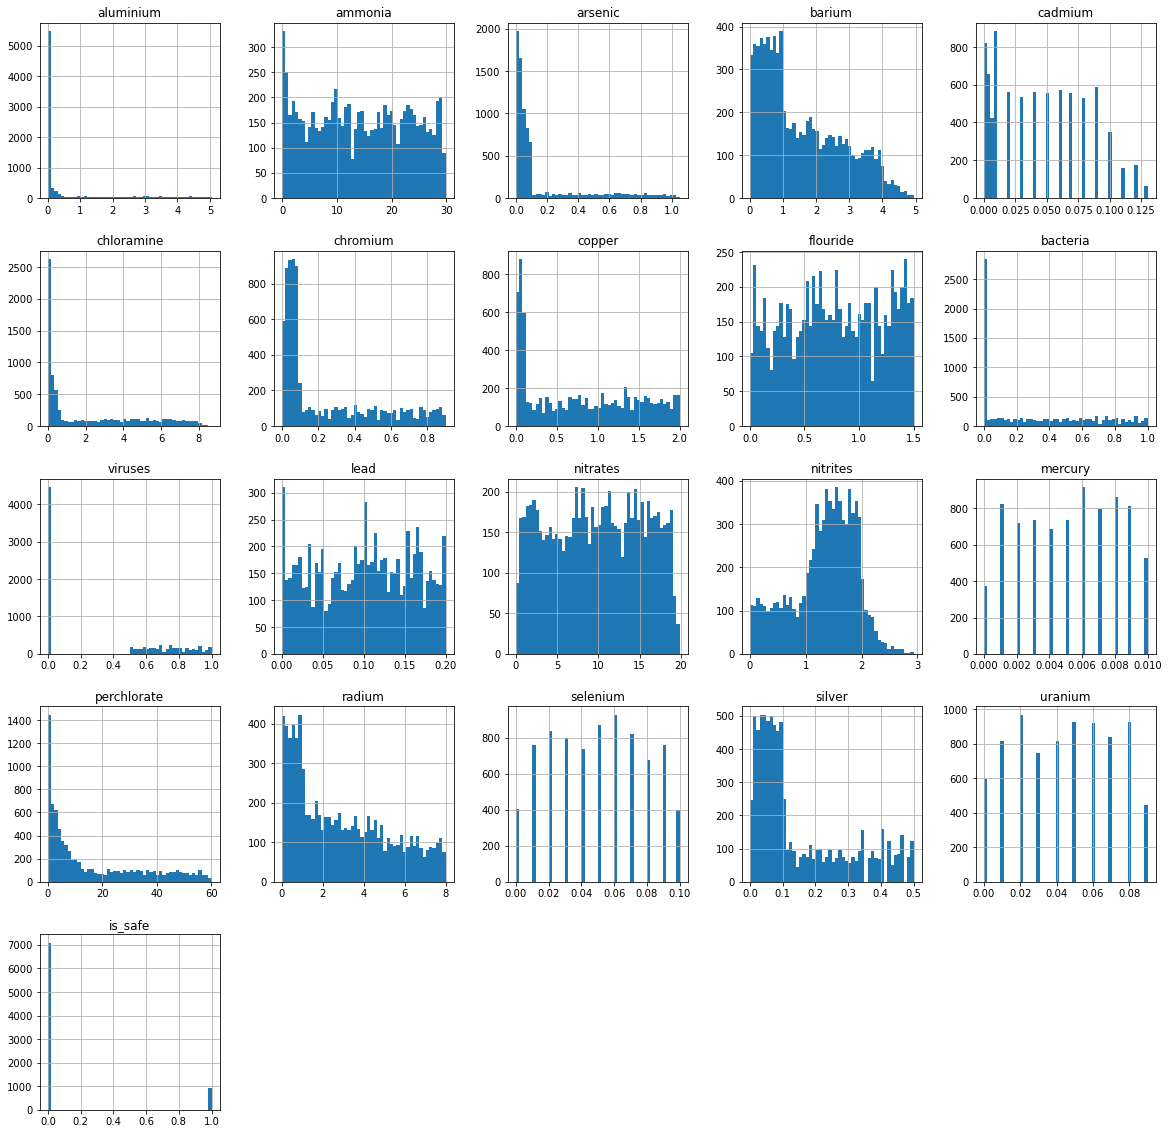

In [7]:
water.hist(bins=50,figsize=(20,20))

In [8]:
water["is_safe"].value_counts()

0    7084
1     912
Name: is_safe, dtype: int64

## Train-Test split

In [9]:
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in split.split(water,water["is_safe"]):
    train_set=water.loc[train_index]
    test_set=water.loc[test_index]

In [10]:
test_set.shape

(1600, 21)

In [11]:
train_set.shape

(6396, 21)

In [12]:
test_set["is_safe"].value_counts()

0    1418
1     182
Name: is_safe, dtype: int64

In [13]:
train_set["is_safe"].value_counts()

0    5666
1     730
Name: is_safe, dtype: int64

## Train features and label

In [14]:
train_features=train_set.drop("is_safe",axis=1).copy()
train_labels=train_set["is_safe"].copy()

In [15]:
train_features.shape

(6396, 20)

In [16]:
train_labels.shape

(6396,)

array([[<AxesSubplot:title={'center':'aluminium'}>,
        <AxesSubplot:title={'center':'ammonia'}>,
        <AxesSubplot:title={'center':'arsenic'}>,
        <AxesSubplot:title={'center':'barium'}>],
       [<AxesSubplot:title={'center':'cadmium'}>,
        <AxesSubplot:title={'center':'chloramine'}>,
        <AxesSubplot:title={'center':'chromium'}>,
        <AxesSubplot:title={'center':'copper'}>],
       [<AxesSubplot:title={'center':'flouride'}>,
        <AxesSubplot:title={'center':'bacteria'}>,
        <AxesSubplot:title={'center':'viruses'}>,
        <AxesSubplot:title={'center':'lead'}>],
       [<AxesSubplot:title={'center':'nitrates'}>,
        <AxesSubplot:title={'center':'nitrites'}>,
        <AxesSubplot:title={'center':'mercury'}>,
        <AxesSubplot:title={'center':'perchlorate'}>],
       [<AxesSubplot:title={'center':'radium'}>,
        <AxesSubplot:title={'center':'selenium'}>,
        <AxesSubplot:title={'center':'silver'}>,
        <AxesSubplot:title={'center':'

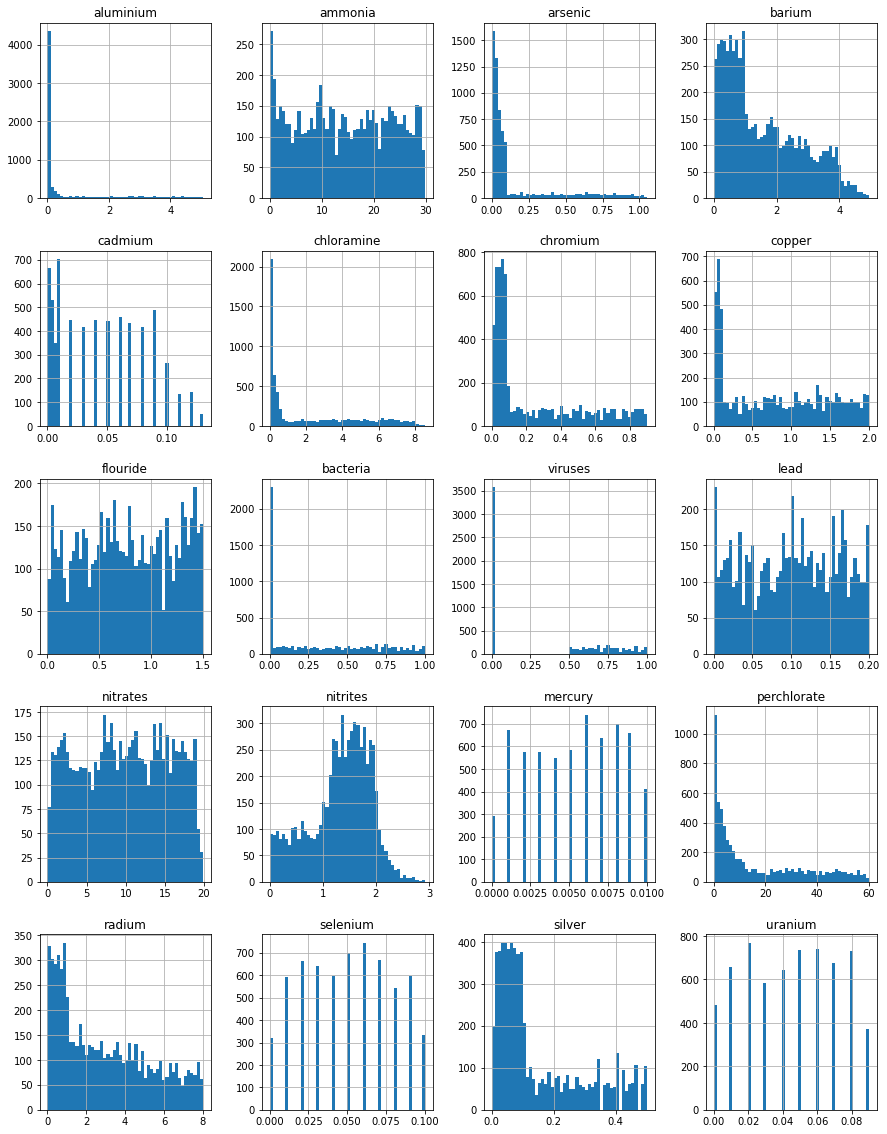

In [17]:
train_features.hist(bins=50,figsize=(15,20))

## Creating a pipeline

In [18]:
my_pipeline=Pipeline(
[
    ("imputer",SimpleImputer(strategy="mean"))
])

In [19]:
train_features=my_pipeline.fit_transform(train_features)

## Selecting a desired model

In [20]:
model1=KNeighborsClassifier()

In [21]:
model2=LogisticRegression()

In [22]:
model3=DecisionTreeClassifier()

In [23]:
model4=RandomForestClassifier()

In [24]:
model1.fit(train_features,train_labels)

KNeighborsClassifier()

In [25]:
model2.fit(train_features,train_labels)

C:\Users\Tejveer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [26]:
model3.fit(train_features,train_labels)

DecisionTreeClassifier()

In [27]:
model4.fit(train_features,train_labels)

RandomForestClassifier()

In [28]:
some_data=train_features[:10]
prepared_data=my_pipeline.fit_transform(some_data)
some_label=train_labels[:10]
model4.predict(prepared_data)

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0], dtype=int64)

In [29]:
some_label

5068    0
5776    0
5493    0
4590    0
7241    0
3283    0
6649    0
4333    1
7440    0
396     0
Name: is_safe, dtype: int64

In [30]:
model1_predicted=model1.predict(train_features)
accuracy_score(train_labels,model1_predicted)

0.9055659787367104

In [31]:
model2_predicted=model2.predict(train_features)
accuracy_score(train_labels,model2_predicted)

0.9008755472170107

In [32]:
model3_predicted=model3.predict(train_features)
accuracy_score(train_labels,model3_predicted)

1.0

In [33]:
model4_predicted=model4.predict(train_features)
accuracy_score(train_labels,model4_predicted)

1.0

## Dumping and storing

In [34]:
dump(model4,"water_quality.joblib")

['water_quality.joblib']

In [35]:
%store test_set

Stored 'test_set' (DataFrame)


In [36]:
%store my_pipeline

Stored 'my_pipeline' (Pipeline)


In [37]:
some_data[0]

array([6.000e-02, 1.011e+01, 4.000e-02, 5.000e-01, 0.000e+00, 0.000e+00,
       5.000e-02, 1.550e+00, 1.090e+00, 0.000e+00, 7.200e-01, 1.370e-01,
       1.466e+01, 6.400e-01, 1.000e-03, 2.000e-02, 1.520e+00, 9.000e-02,
       6.000e-02, 3.000e-02])